<a href="https://colab.research.google.com/github/alvinsenjaya/TomatoPlantDiseases/blob/master/Base_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [0]:
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# **Download Dataset**

In [0]:
os.environ['KAGGLE_USERNAME']="xxxxx"
os.environ['KAGGLE_KEY']="xxxxxxxxxxxxxxxxxxxxx"

In [3]:
!kaggle datasets download noulam/tomato

 98% 730M/743M [00:09<00:00, 85.0MB/s]
100% 743M/743M [00:09<00:00, 80.7MB/s]


In [0]:
!unzip tomato.zip

# **Image Preprocessing**

In [2]:
TRAINING_DIR = '/content/New Plant Diseases Dataset(Augmented)/train/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = '/content/New Plant Diseases Dataset(Augmented)/valid/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=128
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


# **Define Machine Learning Model**

In [3]:
base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(256,256,3))

print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  87


In [4]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [0]:
base_model.trainable = True

fine_tune_at = 74
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [6]:
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 8, 8, 1024)        3228864   
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 1024)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               33554944  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 36,788,938
Trainable params: 35,153,930
Non-trainable params: 1,635,008
_________________________________________________________________


# **Define Learning Parameter**

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Begin Training**

In [8]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
144/144 [==============================] - 265s 2s/step - loss: 2.5937 - accuracy: 0.7359 - val_loss: 1.6030 - val_accuracy: 0.6451
Epoch 2/20
144/144 [==============================] - 265s 2s/step - loss: 0.2694 - accuracy: 0.9104 - val_loss: 1.9921 - val_accuracy: 0.5799
Epoch 3/20
144/144 [==============================] - 265s 2s/step - loss: 0.1977 - accuracy: 0.9341 - val_loss: 1.7852 - val_accuracy: 0.6807
Epoch 4/20
144/144 [==============================] - 265s 2s/step - loss: 0.1603 - accuracy: 0.9461 - val_loss: 0.4194 - val_accuracy: 0.8654
Epoch 5/20
144/144 [==============================] - 265s 2s/step - loss: 0.1338 - accuracy: 0.9557 - val_loss: 3.2614 - val_accuracy: 0.5714
Epoch 6/20
144/144 [==============================] - 266s 2s/step - loss: 0.1186 - accuracy: 0.9609 - val_loss: 0.8935 - val_accuracy: 0.7854
Epoch 7/20
144/144 [==============================] - 265s 2s/step - loss: 0.1134 - accuracy: 0.9625 - val_loss: 2.0252 - val_accuracy: 0.6362

# **Plot Training Results**

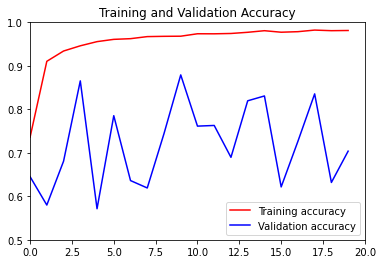

<Figure size 432x288 with 0 Axes>

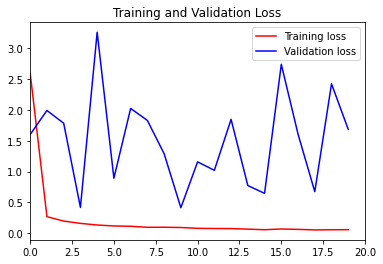

<Figure size 432x288 with 0 Axes>

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.ylim(0.5, 1)
plt.xlim(0, 20)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

#plt.ylim(0, 4)
plt.xlim(0, 20)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# **Save Model**

In [10]:
export_path = "/content/saved_model"

try: 
  os.mkdir(export_path) 
except OSError as error: 
  print(error) 

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

[Errno 17] File exists: '/content/saved_model'
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/saved_model/assets

Saved model:
total 2132
drwxr-xr-x 2 root root    4096 May 29 10:26 assets
-rw-r--r-- 1 root root 2171764 May 29 12:33 saved_model.pb
drwxr-xr-x 2 root root    4096 May 29 12:33 variables


# **Download Saved Model**

In [11]:
!zip -r /content/saved_model.zip /content/saved_model

updating: content/saved_model/ (stored 0%)
updating: content/saved_model/assets/ (stored 0%)
updating: content/saved_model/variables/ (stored 0%)
updating: content/saved_model/variables/variables.index (deflated 76%)
updating: content/saved_model/variables/variables.data-00001-of-00002 (deflated 33%)
updating: content/saved_model/variables/variables.data-00000-of-00002 (deflated 83%)
updating: content/saved_model/saved_model.pb (deflated 92%)


In [0]:
files.download("/content/saved_model.zip")

# **Upload Saved Model**

In [0]:
uploaded = files.upload()
!unzip /content/saved_model.zip
model = tf.keras.models.load_model('/content/saved_model/')
model.summary()

# **Try Classification**

In [12]:
from google.colab import files

file = files.upload()

img = image.load_img(list(file.keys())[0], target_size=(256, 256))
img = image.img_to_array(img)
img = img.reshape(1, 256, 256, 3)
img = img.astype('float32')
img = img / 255.0
result = model.predict(img)
result = list(result[0]).index(max(result[0]))

print("\n\nResult :")

if result == 0:
  print("Bacterial Spot")
elif result == 1:
  print("Early Blight")
elif result == 2:
  print("Late Blight")
elif result == 3:
  print("Leaf Mold")
elif result == 4:
  print("Septoria Leaf Spot")
elif result == 5:
  print("Spider Mites")
elif result == 6:
  print("Target Spot")
elif result == 7:
  print("Yellow Leaf Curl Virus")
elif result == 8:
  print("Mosaic Virus")
else:
  print("Healthy")

Saving datasets_259770_544347_New Plant Diseases Dataset(Augmented)_train_Tomato___Tomato_mosaic_virus_02cb8c4e-4542-4020-bb46-025de54d97ae___PSU_CG 2098_180deg.jpg to datasets_259770_544347_New Plant Diseases Dataset(Augmented)_train_Tomato___Tomato_mosaic_virus_02cb8c4e-4542-4020-bb46-025de54d97ae___PSU_CG 2098_180deg.jpg


Result :
Leaf Mold
